In [1]:
import pandas as pd
import lstm_functions as lf
import datetime as dt
import numpy as np
from scipy.ndimage import gaussian_filter

In [2]:
# oil_data = yf.download('CL=F', start='2023-01-01', end='2023-12-31')
# oil_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

data = pd.read_csv('model/merged_marginal_data.csv')

data['Date'] = data.apply(
    lambda row: (
        dt.datetime(row['Year'].astype(int), row['Month'].astype(int), row['Day'].astype(int), 23, 59, 59)
        if row['Hour'].astype(int) == 24 or row['Hour'].astype(int) == 25
        else dt.datetime(row['Year'].astype(int), row['Month'].astype(int), row['Day'].astype(int), row['Hour'].astype(int))
    ), 
    axis=1
)

data.drop(['Year', 'Month', 'Day', 'Hour'], axis=1, inplace=True)
data.set_index('Date', inplace=True)
data = data['Price1']
data = data.sort_index()

In [3]:
data_series = pd.Series(data.values, index=pd.to_datetime(data.index))

#avoid 0 values by small addition
data_series = data_series + 0.0000001

In [4]:
data_series.max()

np.float64(220.0000001)

Epoch 1/2


C:\Users\tamas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2651/2651 ━━━━━━━━━━━━━━━━━━━━ 3s 921us/step - loss: 0.0315
Epoch 2/2
2651/2651 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - loss: 0.0021
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


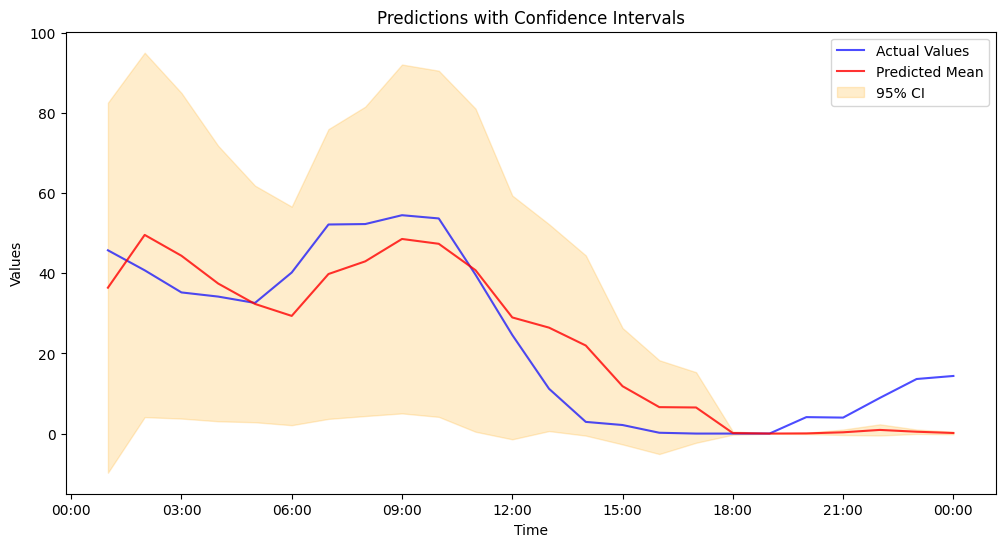

Train RMSE: 647645919.823
Test RMSE: 9.023
                           actual  predicted_mean  predicted_std
Date                                                            
2023-12-31 01:00:00  4.573567e+01       36.400628      23.555691
2023-12-31 02:00:00  4.074062e+01       49.570692      23.195044
2023-12-31 03:00:00  3.522113e+01       44.371452      20.728390
2023-12-31 04:00:00  3.418023e+01       37.431826      17.533197
2023-12-31 05:00:00  3.259656e+01       32.346834      15.062353
2023-12-31 06:00:00  4.018660e+01       29.359920      13.912065
2023-12-31 07:00:00  5.217059e+01       39.813423      18.445125
2023-12-31 08:00:00  5.228091e+01       42.972575      19.693283
2023-12-31 09:00:00  5.448864e+01       48.559138      22.207163
2023-12-31 10:00:00  5.368184e+01       47.354950      22.035080
2023-12-31 11:00:00  3.964896e+01       40.769233      20.567590
2023-12-31 12:00:00  2.460726e+01       28.980138      15.516204
2023-12-31 13:00:00  1.118002e+01       26.4324

In [5]:
#lstm predictions
look_back = 55
log = True
difference = True
transforms = [log, difference]

nodes = 4
epochs = 2
verbose = 1 # 0=print no output, 1=most, 2=less, 3=least
lstm_params = [nodes, epochs, verbose]

# Remove duplicate indices
data_series = data_series[~data_series.index.duplicated(keep='first')]

y_test, pred_mean, pred_std = lf.lstm_model(data_series, look_back, transforms, lstm_params)

Epoch 1/50


C:\Users\tamas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2651/2651 ━━━━━━━━━━━━━━━━━━━━ 3s 930us/step - loss: 0.0062
Epoch 2/50
2651/2651 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - loss: 8.1522e-04
Epoch 3/50
2651/2651 ━━━━━━━━━━━━━━━━━━━━ 2s 919us/step - loss: 4.9348e-04
Epoch 4/50
2651/2651 ━━━━━━━━━━━━━━━━━━━━ 2s 799us/step - loss: 3.9992e-04
Epoch 5/50
2651/2651 ━━━━━━━━━━━━━━━━━━━━ 2s 823us/step - loss: 3.8201e-04
Epoch 6/50
2651/2651 ━━━━━━━━━━━━━━━━━━━━ 2s 788us/step - loss: 2.4551e-04
Epoch 7/50
2651/2651 ━━━━━━━━━━━━━━━━━━━━ 2s 802us/step - loss: 2.5072e-04
Epoch 8/50
2651/2651 ━━━━━━━━━━━━━━━━━━━━ 2s 823us/step - loss: 2.3383e-04
Epoch 9/50
2651/2651 ━━━━━━━━━━━━━━━━━━━━ 2s 814us/step - loss: 2.6220e-04
Epoch 10/50
2651/2651 ━━━━━━━━━━━━━━━━━━━━ 2s 823us/step - loss: 1.7983e-04
Epoch 11/50
2651/2651 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.6993e-04
Epoch 12/50
2651/2651 ━━━━━━━━━━━━━━━━━━━━ 3s 953us/step - loss: 1.5360e-04
Epoch 13/50
2651/2651 ━━━━━━━━━━━━━━━━━━━━ 2s 807us/step - loss: 1.7914e-04
Epoch 14/50
2651/2651 ━━━━━━━━━━━━━━━━

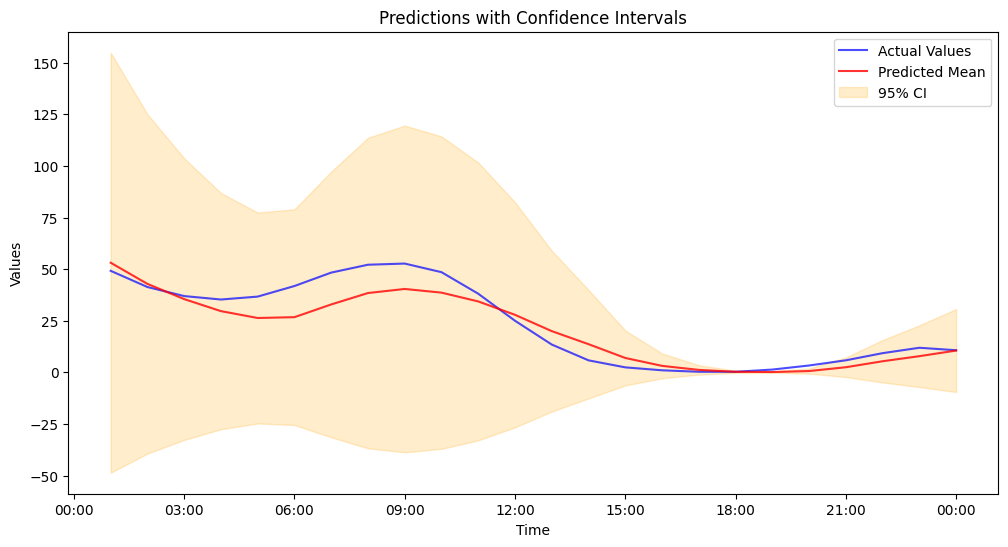

Train RMSE: 171664004.486
Test RMSE: 7.264
                        actual  predicted_mean  predicted_std
Date                                                         
2023-12-31 01:00:00  49.195615       53.119950      51.898769
2023-12-31 02:00:00  41.348179       42.864592      41.932235
2023-12-31 03:00:00  36.963217       35.493025      34.786997
2023-12-31 04:00:00  35.296177       29.670230      29.186067
2023-12-31 05:00:00  36.712734       26.346204      26.056146
2023-12-31 06:00:00  41.840006       26.746656      26.659338
2023-12-31 07:00:00  48.339164       32.911478      32.831394
2023-12-31 08:00:00  52.150325       38.438096      38.376803
2023-12-31 09:00:00  52.710050       40.411930      40.372927
2023-12-31 10:00:00  48.536974       38.627238      38.604407
2023-12-31 11:00:00  38.094551       34.364248      34.326364
2023-12-31 12:00:00  24.999594       27.883437      27.801230
2023-12-31 13:00:00  13.478794       19.978402      19.868767
2023-12-31 14:00:00   5.829

In [6]:
gauss_data = pd.Series(gaussian_filter(data_series, sigma=1), index=data_series.index).astype(float)
# running LSTM with Gaussian-filtered data
look_back = 55
log = True
difference = True
transforms = [log, difference]

nodes = 4
epochs = 50
verbose = 1 # 0=print no output, 1=most, 2=less, 3=least
lstm_params = [nodes, epochs, verbose]

# This compares the predicted values to the gaussian-filtered data
y_test, pred_mean, pred_std = lf.lstm_model(gauss_data, look_back, transforms, lstm_params)

## Gaussian-filtered predictions compared to the original data

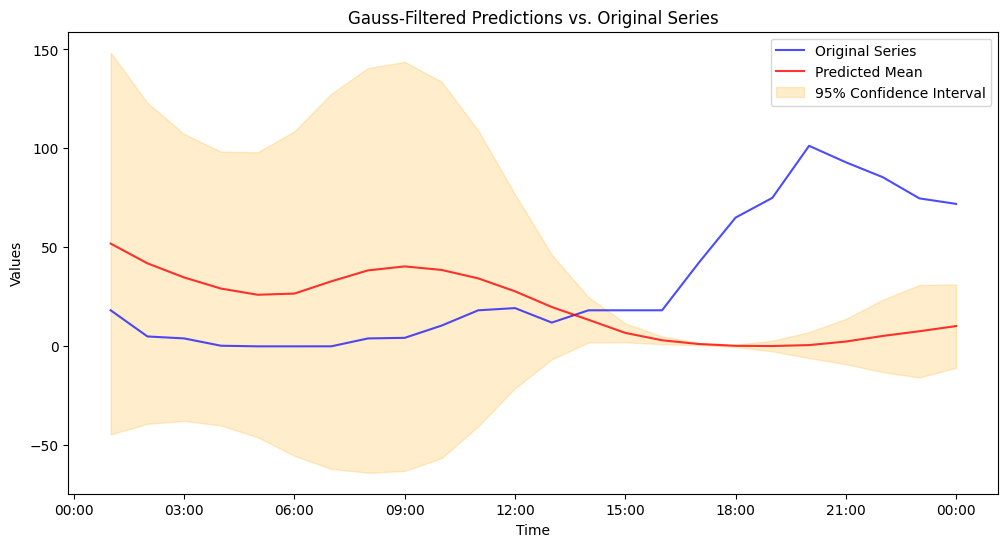

Test RMSE: 48.031


In [7]:
gaussian_compare = lf.gauss_compare(data_series, pred_mean, pred_std)